## Exploratory Data Analysis of our graph

### Load Reviewers - Movies Graph

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = '../data/reviews_clean.csv'
#file_path = '../data/reviews.csv'
df = pd.read_csv(file_path)

G = nx.from_pandas_edgelist(
    df,
    source='Source',
    target='Target',
    edge_attr=['review_score_scaled', 'top_critic', 'review_type'],
    create_using=nx.Graph()
)

In [3]:
print(f"Number of nodes: {G.number_of_nodes()}") 
print(f"Number of edges: {G.number_of_edges()}") 
print(f"Number of connected components: {nx.number_connected_components(G)}")

Number of nodes: 24011
Number of edges: 692227
Number of connected components: 2


In [4]:
from networkx.algorithms import bipartite
print(bipartite.is_bipartite(G))

True


In [5]:
# Connected components
GCC=list(G.subgraph(c) for c in nx.connected_components(G))[0]

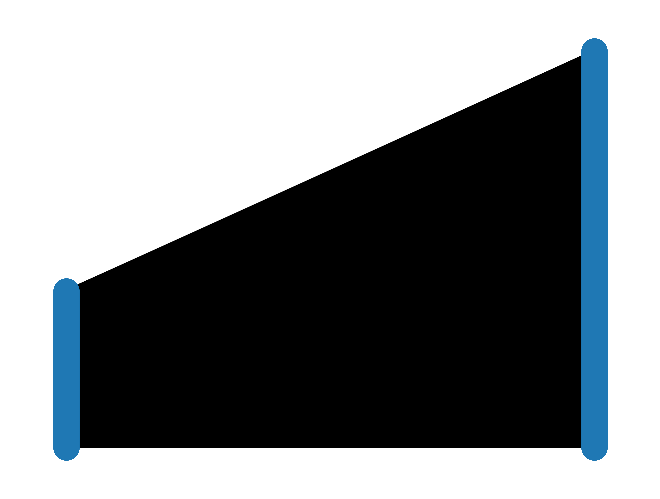

In [6]:
# print bipartite graph (not in such a presentable form)
X, Y = nx.bipartite.sets(GCC)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(GCC, pos=pos)
plt.show()

In [7]:
for c in nx.connected_components(G):
    print(G.subgraph(c))

Graph with 24009 nodes and 692226 edges
Graph with 2 nodes and 1 edges


In [8]:
print(f"Fraction of nodes in GCC: {GCC.number_of_nodes() / G.number_of_nodes()}")
print(f"Fraction of edges in GCC: {GCC.number_of_edges() / G.number_of_edges()}")

Fraction of nodes in GCC: 0.9999167048436134
Fraction of edges in GCC: 0.9999985553871779


### Degree distribution

In [9]:
# Degree
degree_sequence = list(dict(G.degree()).values())
print(f"Min degree: {np.min(degree_sequence)}")
print(f"Max degree: {np.max(degree_sequence)}")
print(f"Median degree: {np.median(degree_sequence)}")
print(f"Mean degree: {np.mean(degree_sequence)}")

Min degree: 1
Max degree: 6616
Median degree: 16.0
Mean degree: 57.6591562200658


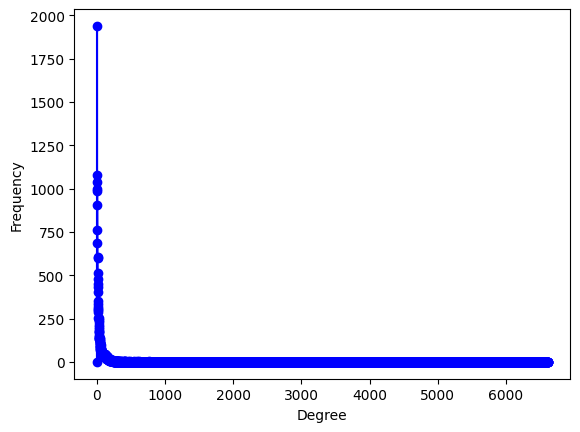

In [10]:
# Degree distribution
y=nx.degree_histogram(G)
plt.figure(1)
plt.plot(y,'b-',marker='o')
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.draw()
plt.show()

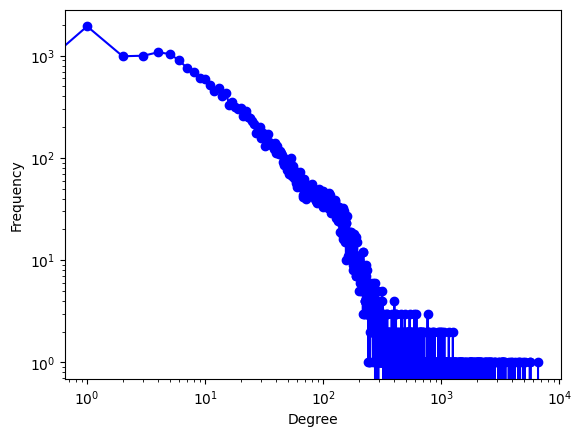

In [11]:
plt.figure(2)
plt.loglog(y,'b-',marker='o')
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.draw()
plt.show()
# based on these plots we have strong indications say that node degree in our graph follows a power-law distribution, which is an expected result